# Building a Sentiment Analysis of Tweets 
### * Tweepy
### * TextBlob
### * WordCloud
### * NLTK

## Goal:
To analyze a prominent global leader's tweets': 1) Themes; 2) Sentiments (polarity and subjectivity)' during a crisis, such as the Beirut Explosion on August 4, 2020 in Lebanon.

## Resources 

In [32]:
!pip install tweepy

In [33]:
!pip install textblob

In [34]:
!pip install preprocessor

# Project 1: Javad Zarif
@JZarif
Foreign Minister of Islamic Republic of Iran
https://www.youtube.com/watch?v=ujId4ipkBio&t=361s

In [1]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import nltk
from nltk.corpus import stopwords
from collections import Counter

In [3]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = '---'
consumer_secret = '0SH___' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

## Load Data set

In [4]:
import pandas as pd

In [6]:
#Extract 200 Tweets from the Twitter User on Lebanon
zarif_tweets_lb = api.user_timeline(screen_name = 'JZarif', count = 200, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets_lb[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: https://t.co/EB5527WvWk

2) I just published Using Security Council to Destroy Security Council https://t.co/q0LA5U6Vrn

3) I just published The World in Transition https://t.co/RXN0z7CnQX

4) The first three (of five) talks on "The World in Transition" that I've delivered at the Faculty of World Studies, University of Tehran, are available here: 

First Session:
https://t.co/1iPd6jOYJG

Second Session:
https://t.co/ulgSbCbuxK

Third Session:
https://t.co/C0DMXmQuW6

5) I'll be delivering the third of five online talks at Faculty of World Studies, University of Tehran, today, Aug 10, 12:30-13:15 UTC

Topic: Power Shifts and New Players in the Transitional Period

Live Insta

#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 200, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

In [8]:
#Create a dataframe with a column and label column as 'Tweets_Lb'
import pandas as pd
df2 = pd.DataFrame([tweet.full_text for tweet in zarif_tweets_lb], columns = ['Tweets_Lb'])
df2.head(10)

,Tweets_Lb
0,US is so desperate to show support for its str...
1,I just published Using Security Council to Des...
2,I just published The World in Transition https...
3,"The first three (of five) talks on ""The World ..."
4,I'll be delivering the third of five online ta...
5,"75 years ago today, the US gained the infamy o..."
6,@iabbasian ممنون از لطف شما و تذکرتان.
7,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...
8,عندما يريد الناطقون بالفارسية تقديم التعازي لل...
9,When Persian speakers want to express their co...


## Clean text

In [12]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets,subjectivity,polarity,Analysis
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral
...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative


In [9]:
#Create a function to clean Lb LEBANON tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df2['Tweets_Lb'] = df2['Tweets_Lb'].apply(clean_text)
df2

,Tweets_Lb
0,US is so desperate to show support for its str...
1,I just published Using Security Council to Des...
2,I just published The World in Transition
3,"The first three (of five) talks on ""The World ..."
4,I'll be delivering the third of five online ta...
...,...
195,Important progress in Yerevan as Iran joins EE...
196,今天是中华人民共和国七十周年华诞，经过70年，中国成为了和平发展与人民安康的象征。中国对多边...
197,"On Rūmī's 812th birthday, our region and the w..."
198,"""Any war that the United Starts, it won't be a..."


In [13]:
##Don't Run
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['polarity'] = df['Tweets'].apply(get_polarity)

#Show the new dataframe
df

,Tweets,subjectivity,polarity,Analysis
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral
...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative


In [10]:
#Lebanon 
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df2['subjectivity'] = df2['Tweets_Lb'].apply(get_subjectivity)
df2['polarity'] = df2['Tweets_Lb'].apply(get_polarity)

#Show the new dataframe
df2

,Tweets_Lb,subjectivity,polarity
0,US is so desperate to show support for its str...,0.575000,-0.150000
1,I just published Using Security Council to Des...,0.000000,-0.200000
2,I just published The World in Transition,0.000000,0.000000
3,"The first three (of five) talks on ""The World ...",0.213333,0.180000
4,I'll be delivering the third of five online ta...,0.238636,0.068182
...,...,...,...
195,Important progress in Yerevan as Iran joins EE...,0.466667,0.166667
196,今天是中华人民共和国七十周年华诞，经过70年，中国成为了和平发展与人民安康的象征。中国对多边...,0.000000,0.000000
197,"On Rūmī's 812th birthday, our region and the w...",0.500000,0.500000
198,"""Any war that the United Starts, it won't be a...",0.587500,0.425000


### Observation: 
We can now see the three columns for analysis, like wordcloud to visualize.

## Analysis: Word Cloud

<function matplotlib.pyplot.show(*args, **kw)>

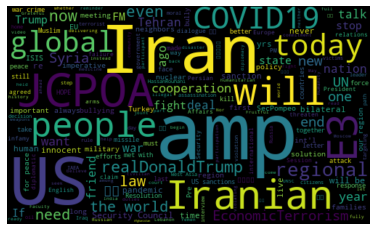

In [11]:
#Plot the Word Cloud for Lebanon Tweets
all_words = ''.join([twts for twts in df2['Tweets_Lb']])
WordCloud = WordCloud(width = 500, height= 300, random_state = 21, 
                      max_font_size =110).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

### Observations:
* We see that Iran and US are most noticeable and that @realdonaldtrump is mentioned frequently. Perhaps there was an online exchange over Twitter. 
* We see that JCPOA, which stands for joint agreement between Iran, US, Iran, Germany, and UK promoting nuclear nonproliferation goals achieved during Obama-Biden administration.
* We see that COVID19 features prominently.

In [12]:
#Create a function to denote the positive, negative, and neutral analysis on Tweets_Lb
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df2['Analysis'] = df2['polarity'].apply(getAnalysis)

#Show df
df2

,Tweets_Lb,subjectivity,polarity,Analysis
0,US is so desperate to show support for its str...,0.575000,-0.150000,Negative
1,I just published Using Security Council to Des...,0.000000,-0.200000,Negative
2,I just published The World in Transition,0.000000,0.000000,Neutral
3,"The first three (of five) talks on ""The World ...",0.213333,0.180000,Positive
4,I'll be delivering the third of five online ta...,0.238636,0.068182,Positive
...,...,...,...,...
195,Important progress in Yerevan as Iran joins EE...,0.466667,0.166667,Positive
196,今天是中华人民共和国七十周年华诞，经过70年，中国成为了和平发展与人民安康的象征。中国对多边...,0.000000,0.000000,Neutral
197,"On Rūmī's 812th birthday, our region and the w...",0.500000,0.500000,Positive
198,"""Any war that the United Starts, it won't be a...",0.587500,0.425000,Positive


In [15]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,subjectivity,polarity,Analysis
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral
...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative


In [16]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1
      

1Reiterated Iran's strong and steadfast solidarity with people of Lebanon in call with FM Wehbeh. 

Iran is sending field hospital &amp; medicine to assist with disaster relief. 

Iran stands with Lebanon. 

2Our thoughts and prayers are with the great and resilient people of Lebanon. 

As always, Iran is fully prepared to render assistance in any way necessary. 

Stay strong, Lebanon.

🖤🇱🇧

3Today, Iranians mark their seismic achievement in 1906

Demanding accountability from the king, they compelled him to allow formation of the first parliament in our region

While mostly ignored before Islamic Revolution, we in government are now held to account by the Parliament. 

4Just had a very substantive, frank and friendly video conversation with UAE FM @ABZayed, discussing Covid as well as bilateral, regional and global situations. 

We agreed to continue dialog on theme of hope—especially as region faces tough challenges, and tougher choices ahead. 

5Very productive meeting with Chairman

### Observation:
94 out of the 200 tweets are positive.

In [16]:
#Let's see Negative Tweets of Tweets_LB in newer df
j = 1
sorted_DF2 = df2.sort_values(by = 'polarity')
for i in range(0, sorted_DF2.shape[0]):
    if (sorted_DF2['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF2['Tweets_Lb'][i])
        print()  #print a new line
        j = j+1

1)US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: 

2)I just published Using Security Council to Destroy Security Council 

3)75 years ago today, the US gained the infamy of becoming the 1st and ONLY user of nuclear weapons. And against innocents.

Today, US &amp; Israeli nukes threaten our region.

It's long overdue to end nuclear nightmare &amp; the MAD doctrine of Mutually Assured Destruction.

Hiroshima75 

4)As we mark EidAlAdha (Feast of the Sacrifice), let us all pray and commit ourselves to sacrifice what some—sadly—are willing to kill for: short-sighted, zero-sum and selfish interests.

Our Ummah and our global community require this paradigm shift for survival.

5)Productive talks in Baghdad with PM @MAKadhimi, Pres. @BarhamSalih, Speaker Halbousi

In [17]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)75 years ago today, the US gained the infamy of becoming the 1st and ONLY user of nuclear weapons. And against innocents.

Today, US &amp; Israeli nukes threaten our region.

It's long overdue to end nuclear nightmare &amp; the MAD doctrine of Mutually Assured Destruction.

Hiroshima75 

2)As we mark EidAlAdha (Feast of the Sacrifice), let us all pray and commit ourselves to sacrifice what some—sadly—are willing to kill for: short-sighted, zero-sum and selfish interests.

Our Ummah and our global community require this paradigm shift for survival.

3)Productive talks in Baghdad with PM @MAKadhimi, Pres. @BarhamSalih, Speaker Halbousi, FM @Fuad_Hussein1 and judicial, political and military leaders.

Agenda: Expanding cooperation to benefit our peoples—and the region.

Next stop: Erbil for meetings with Kurdish leadership. 

4)25 yrs ago today, SrebrenicaGenocide began as Europe failed to uphold its basic duties. Quarter of a century later Europe is plagued by same ineptitude.

The fai

### Observation:
57 out of the 200 tweets are negative. In contrast, there are almost double the number of positive tweets by Foreign Minister Javed Zarif.
* Interesting: Mentioning Uniting for Palestinians is considered 'negative'.
* Arguing for "Stop War" as a theme came up as negative.

## Visualize Tweets by Foreign Minister Javed Zarif.
We are comparing the polarity and subjectivity of Javed Zarif's tweets from July to the ones shared during Beirut Blast in Lebanon to get an idea of thematic consistency.

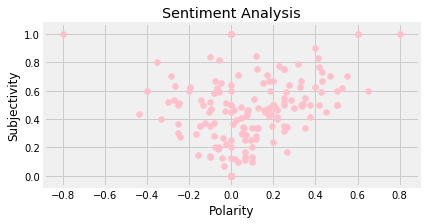

In [18]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

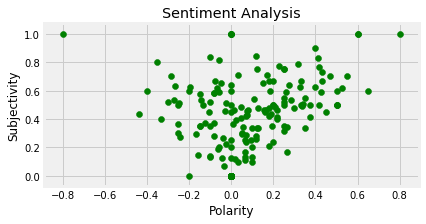

In [19]:
#Plot the polarity and subjectivity for Tweets_Lb
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF2.shape[0]): 
    plt.scatter(df2['polarity'][i], df2['subjectivity'][i], color = 'Green') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()

### Observation:
We see that Javed's tweets mostly skew positive. 

In [19]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

5      Reiterated Iran's strong and steadfast solidar...
6      Our thoughts and prayers are with the great an...
9      Today, Iranians mark their seismic achievement...
12     Just had a very substantive, frank and friendl...
13     Very productive meeting with Chairman of the I...
                             ...                        
190    Important progress in Yerevan as Iran joins EE...
192    On Rūmī's 812th birthday, our region and the w...
193    "Any war that the United Starts, it won't be a...
194    Thanks to technology, I was able to see and ta...
199    Told @margbrennan: You sell me a building, but...
Name: Tweets, Length: 97, dtype: object


In [20]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

48.5

In [49]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

1      Productive talks in Baghdad with PM @MAKadhimi...
3      25 yrs ago today, SrebrenicaGenocide began as ...
5      Don't believe the hype: Iran triggered JCPOA D...
9      The US isn't merely violating JCPOA and bullyi...
11     .@SecPompeo is so desperate to mislead the wor...
12     E3 must stop public face-saving &amp; muster t...
14     Iran &amp; Russia are "determined to deal with...
16     Productive talks with my friend @MevlutCavusog...
17     International Criminal COURT now blackmailed b...
19     US has tried to heighten tension w/ Iran &amp;...
20     We achieved humanitarian swap *despite* your s...
24     Some don't think BlackLivesMatter.\n\nTo those...
29     Disgusting that those whose civilization found...
33     Today is "Honoring Philanthropists' Day" in ou...
38     2 yrs ago, @SecPompeo and his boss declared "C...
41     US has been bullying all against UNSC Resoluti...
44     Iran will be EXPORTING ventilators in a few mo...
53     Don’t be mislead by usua

In [50]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

28.5

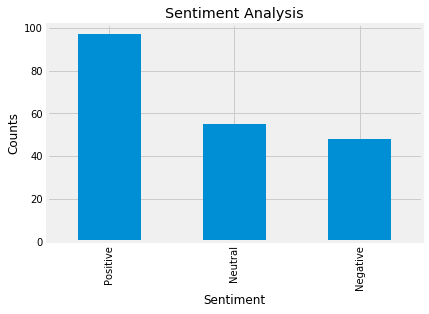

In [21]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

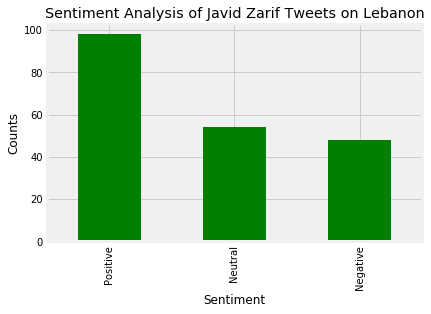

In [20]:
#Show the value counts for Tweets_Lb
df2['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis of Javid Zarif Tweets on Lebanon')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df2['Analysis'].value_counts().plot(kind='bar', color='Green')
plt.show()

### Observations:
As mentioned earlier, this Twitter account's sample of 200 tweets reflects mostly positive tweets. We again see it in the more recent graph shown in green representing mostly positive tweets during crisis. Approximimately 75 percent of the tweets are positive, thus 25 percent are neutral. 
Let's look at 200 of his followers below:

In [21]:
#Create a list of followers
followers = []

In [22]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)

In [25]:
#Get Followers' ID Method
followers_ids = []
#Below is protected info

In [23]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))

Followers: Amin7032597453Ashinwari10farhanian57HamidryeganeHasanAlijafri12Mahdi84849765mveAHfcVnt3NU2NSamsoorWadan2srn7rHSaAFPKB6VWaqarHusnain5


In [27]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)

In [28]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


### Trending Topics

In [25]:
#Trending Topics
trends_available = api.trends_available()
len(trends_available)

467

In [31]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [26]:
#A week after blass; Two weeks after initial

trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [32]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [33]:
#Trending Places
world_trends = api.trends_place(id=1)

In [34]:
trends_list =world_trends[0]['trends']

In [35]:
#Aug 6th's Trend topic list
trends_list[0]

{'name': '#우리워너원_3주년에도_사랑해',
 'url': 'http://twitter.com/search?q=%23%EC%9A%B0%EB%A6%AC%EC%9B%8C%EB%84%88%EC%9B%90_3%EC%A3%BC%EB%85%84%EC%97%90%EB%8F%84_%EC%82%AC%EB%9E%91%ED%95%B4',
 'promoted_content': None,
 'query': '%23%EC%9A%B0%EB%A6%AC%EC%9B%8C%EB%84%88%EC%9B%90_3%EC%A3%BC%EB%85%84%EC%97%90%EB%8F%84_%EC%82%AC%EB%9E%91%ED%95%B4',
 'tweet_volume': 470624}

In [36]:
#Volume of 10,000 tweets
trends_list = [t for t in trends_list if t['tweet_volume']]

In [37]:
from operator import itemgetter
trends_list.sort(key = itemgetter('tweet_volume'),reverse= True)

In [38]:
for trend in trends_list[:5]:
    print(trend['name'])

#우리워너원_3주년에도_사랑해
#DishaAndSSRHomicide
#SevgiLimitTanimaz
Hiroshima
#TREASURE_DEBUT_DDAY


In [39]:
#Let's get top trending topics in Washington, DC on July 19th
dc_trends = api.trends_place(id= 2514815) #WOEID = Washington, District of Columbia, 2514815
dc_list = dc_trends[0]['trends']
dc_list = [t for t in dc_list if t['tweet_volume']]
dc_list.sort(key =itemgetter('tweet_volume'), reverse = True)
for trend in dc_list[:10]:
    print(trend['name'])

Biden
Lebanon
Hiroshima
#BB22
#FOURTHCOUNTDOWN
The NRA
Pence
Lakers
Letitia James
Independence Day


### Observation:
We see that the top 10 trending topics in DC are Biden, Lebanon, Hiroshima, two hashtags, The NRA, Pence, Lakers, Letitia James, and Independence Day. 

## Sentiment Analysis

In [41]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

In [42]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,subjectivity,polarity,Analysis,tweets_fixed
0,"75 years ago today, the US gained the infamy o...",0.812500,-0.056250,Negative,"75 years ago today, the US gained the infamy o..."
1,@iabbasian ممنون از لطف شما و تذکرتان.,0.000000,0.000000,Neutral,@iabbasian ممنون از لطف شما و تذکرتان.
2,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,0.000000,0.000000,Neutral,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...
3,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,0.000000,0.000000,Neutral,عندما يريد الناطقون بالفارسية تقديم التعازي لل...
4,When Persian speakers want to express their co...,0.200000,0.000000,Neutral,When Persian speakers want to express their co...
...,...,...,...,...,...
195,"At the UNSC, I explained what Hormuz Peace End...",0.000000,0.000000,Neutral,"At the UNSC, I explained what Hormuz Peace End..."
196,Your daily reminder that Israel possesses the ...,0.500000,0.000000,Neutral,Your daily reminder that Israel possesses the ...
197,E3's paralysis in fulfilling their obligations...,0.472576,-0.093636,Negative,E3's paralysis in fulfilling their obligations...
198,9/22/1980 is a dark day for Iranians as it mar...,0.200000,-0.075000,Negative,9/22/1980 is a dark day for Iranians as it mar...


## Analysis:  Conducting TFIDF

In [66]:
X_train = df['Tweets']
X = df['Tweets']
df

,Tweets,subjectivity,polarity,Analysis
0,Fruitful continuation of visit to Iraqi Kurdis...,0.733333,0.433333,Positive
1,Productive talks in Baghdad with PM @MAKadhimi...,0.066667,-0.033333,Negative
2,Today is 5th anniv. of the JCPOA—last decade’s...,0.500000,0.500000,Positive
3,"25 yrs ago today, SrebrenicaGenocide began as ...",0.135714,-0.102381,Negative
4,My virtual dialog earlier today with Rome 2020...,0.333333,0.100000,Positive
...,...,...,...,...
195,As the world—minus 3 or 2 panicked cohorts—was...,0.250000,0.000000,Neutral
196,"Did you know, @realdonaldtrump, that Netanyahu...",0.063889,0.000000,Neutral
197,,0.000000,0.000000,Neutral
198,The possessor of REAL nukes cries wolf—on an A...,0.411364,0.206818,Positive


In [27]:
#Reviewing 'Tweets_Lb'
X_train = df2['Tweets_Lb']
X = df2['Tweets_Lb']
df2

,Tweets_Lb,subjectivity,polarity,Analysis
0,US is so desperate to show support for its str...,0.575000,-0.150000,Negative
1,I just published Using Security Council to Des...,0.000000,-0.200000,Negative
2,I just published The World in Transition,0.000000,0.000000,Neutral
3,"The first three (of five) talks on ""The World ...",0.213333,0.180000,Positive
4,I'll be delivering the third of five online ta...,0.238636,0.068182,Positive
...,...,...,...,...
195,Important progress in Yerevan as Iran joins EE...,0.466667,0.166667,Positive
196,今天是中华人民共和国七十周年华诞，经过70年，中国成为了和平发展与人民安康的象征。中国对多边...,0.000000,0.000000,Neutral
197,"On Rūmī's 812th birthday, our region and the w...",0.500000,0.500000,Positive
198,"""Any war that the United Starts, it won't be a...",0.587500,0.425000,Positive


In [70]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split

vect = CountVectorizer()
vect.fit(X)

CountVectorizer()

In [74]:
vectorizer = TfidfVectorizer(max_df=.6, # drop words that occur in more than 60% the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since shouting uses CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer to 'X', which is the 'Tweets' column to produce zarif_tweets_tfidf
zarif_tweets_tfidf = vectorizer.fit_transform(X)
print("Number of features: %d" % zarif_tweets_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(zarif_tweets_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tweets_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tweets_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
print(terms)

Number of features: 682
['000', '11', '15', '17', '19', '1979', '19th', '2017', '2018', '2020', '2231', '24', '25', '30', '36', '40', '5th', 'abandon', 'able', 'abroad', 'absurd', 'access', 'accord', 'achieved', 'achieving', 'act', 'action', 'adana', 'addiction', 'address', 'administration', 'admitted', 'adventurism', 'advice', 'affairs', 'affected', 'afghan', 'afghanistan', 'afraid', 'african', 'agenda', 'aggression', 'ago', 'agreed', 'agreement', 'ahead', 'allies', 'alternative', 'ambassador', 'american', 'amid', 'amp', 'ancient', 'anniversary', 'antonioguterres', 'apartheid', 'appeasement', 'appeasing', 'appetite', 'appreciate', 'armed', 'arms', 'arrogant', 'asia', 'assassination', 'assassinations', 'assist', 'assistance', 'astana', 'attack', 'attacks', 'attend', 'avoid', 'away', 'b_team', 'bank', 'base', 'begin', 'begun', 'behavior', 'believe', 'better', 'bilateral', 'blamed', 'blaming', 'blood', 'bloodshed', 'blueprint', 'body', 'bowing', 'break', 'bring', 'brother', 'building', '

In [77]:
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tweets_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tweets_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X[10])
print('Tf_idf vector:', tfidf_bypara[25])

Original sentence: 在中国端午节来临前夕，很高兴同中国国务委员兼外长王毅举行视频会晤。我们就深化两国全面战略伙伴关系、推动25年双边合作计划、加强在国际事务中相互支持等议题达成共识。我们都重申对伊核协议、多边主义及国际法的支持，共同反对单边主义、反对削弱伊核协议。借此机会，要特别祝中国朋友们端午安康！
Tf_idf vector: {'worldwide': 0.26495932987212667, 'colleagues': 0.238954333063999, 'assistance': 0.25031407515543835, 'embassies': 0.26495932987212667, 'ministry': 0.26495932987212667, 'victims': 0.22182527956262918, 'tragedy': 0.26495932987212667, 'consulates': 0.26495932987212667, 'foreign': 0.20903142075597836, 'missions': 0.26495932987212667, 'needed': 0.26495932987212667, 'stand': 0.26495932987212667, 'nation': 0.22182527956262918, 'share': 0.26495932987212667, 'ready': 0.238954333063999, 'families': 0.22182527956262918}


#### Observation:
We see that the highest score is .264 and includes terms: 'embassies','worldwide', 'missions', 'tragedy'.
Let's plot the TF-IDF vectors and their appearance.


### Dimension Reduction

In [79]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 682 to 100.
svd= TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tweets_tfidf_csr)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 95.74242589767863


#### Observation:
Capturing 95.7 percent of the components' variance is promising.

### Heatmap: Sentence Similarity Scores

## Alternative Method for Count Vectorizer

In [18]:
# We are going to create a document-term matrix of where the negative tweets are by 
    #using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(sorted_DF.Analysis) #replace transcript
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = sorted_DF.index
data_dtm

,negative,neutral,positive
114,1,0,0
191,1,0,0
190,1,0,0
108,1,0,0
33,1,0,0
...,...,...,...
87,0,0,1
105,0,0,1
100,0,0,1
138,0,0,1
